In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [2]:
df = pd.read_csv("cgwb-changes-in-depth-to-water-level.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'cgwb-changes-in-depth-to-water-level.csv'

In [ ]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())
df['date'] = pd.to_datetime(df['date'], errors='coerce')

['id', 'date', 'state_name', 'state_code', 'district_name', 'district_code', 'station_name', 'latitude', 'longitude', 'basin', 'sub_basin', 'source', 'currentlevel', 'level_diff']


In [ ]:
df.head()

,id,date,state_name,state_code,district_name,district_code,station_name,latitude,longitude,basin,sub_basin,source,currentlevel,level_diff
0,0,2013-11-04,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,0.10,-1.03
1,1,2014-05-14,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,2.60,2.50
2,2,2014-11-04,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,0.35,-2.25
3,3,2015-05-14,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,2.52,2.17
4,4,2015-11-04,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,0.69,-1.83


In [ ]:
df.describe()

,id,date,state_code,district_code,latitude,longitude,currentlevel,level_diff
count,550850.000000,550850,550850.000000,550850.000000,550850.000000,550850.000000,550850.000000,550850.000000
mean,275424.500000,2016-12-10 10:55:51.878732544,22.550522,396.961078,20.156235,79.304912,8.515535,0.015445
min,0.000000,2013-01-01 00:00:00,1.000000,1.000000,8.083330,68.675000,0.000000,-276.580000
25%,137712.250000,2014-11-06 00:00:00,19.000000,312.000000,14.916670,75.993060,2.900000,-1.300000
50%,275424.500000,2016-11-04 00:00:00,23.000000,433.000000,21.347500,78.166670,5.450000,0.300000
75%,413136.750000,2018-11-07 00:00:00,29.000000,535.000000,24.470560,82.237500,9.650000,1.550000
max,550849.000000,2023-03-31 00:00:00,38.000000,704.000000,33.741110,96.133330,299.300000,253.510000
std,159016.842228,NaN,9.200259,169.397554,6.202342,4.766219,10.717358,5.773125


In [ ]:
df.nunique()

,0
id,550850
date,3715
state_name,32
state_code,32
district_name,565
district_code,567
station_name,23078
latitude,16272
longitude,15098
basin,23


In [ ]:
df.isnull().sum()

,0
id,0
date,0
state_name,0
state_code,0
district_name,0
district_code,0
station_name,0
latitude,0
longitude,0
basin,0


/tmp/ipython-input-11-3080642106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_avg.head(30), y='district_name', x='currentlevel', palette='viridis')


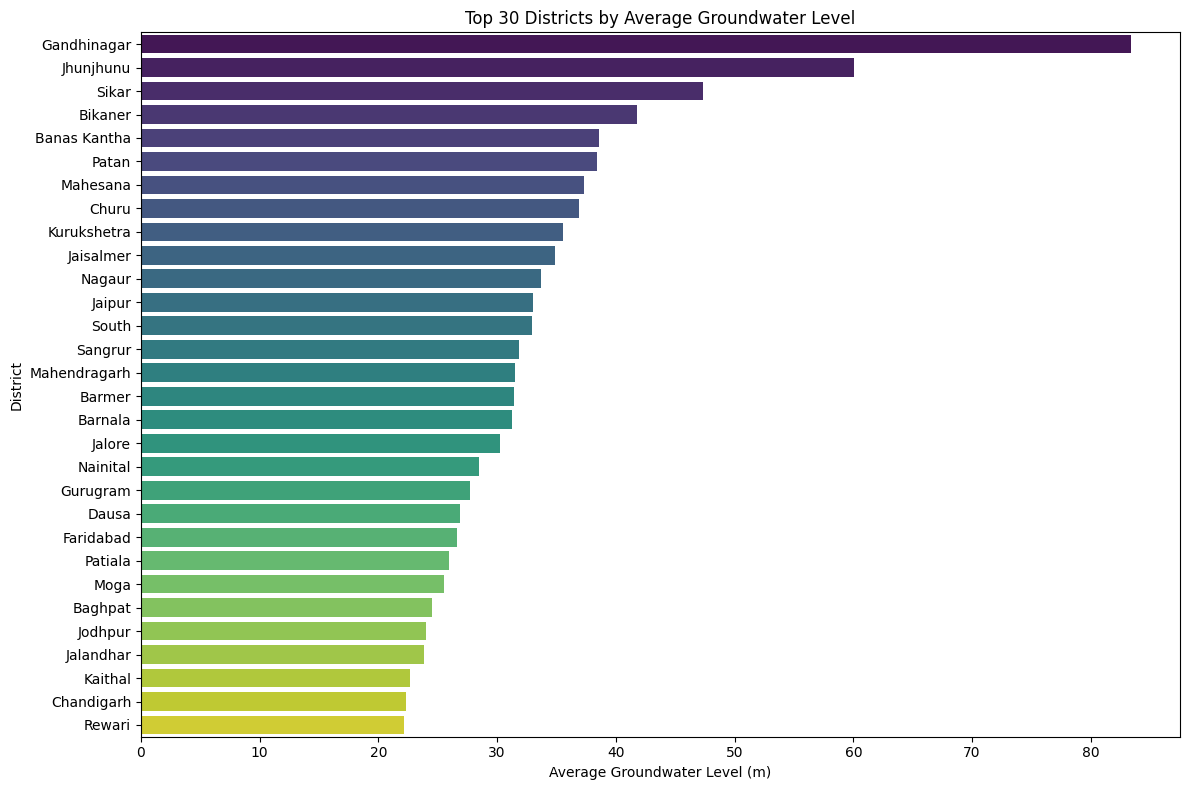

In [ ]:
district_avg = df.groupby('district_name')['currentlevel'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=district_avg.head(30), y='district_name', x='currentlevel', palette='viridis')
plt.title('Top 30 Districts by Average Groundwater Level')
plt.xlabel('Average Groundwater Level (m)')
plt.ylabel('District')
plt.tight_layout()
plt.show()

/tmp/ipython-input-12-2798706979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_avg.head(32), y='state_name', x='currentlevel', palette='viridis')


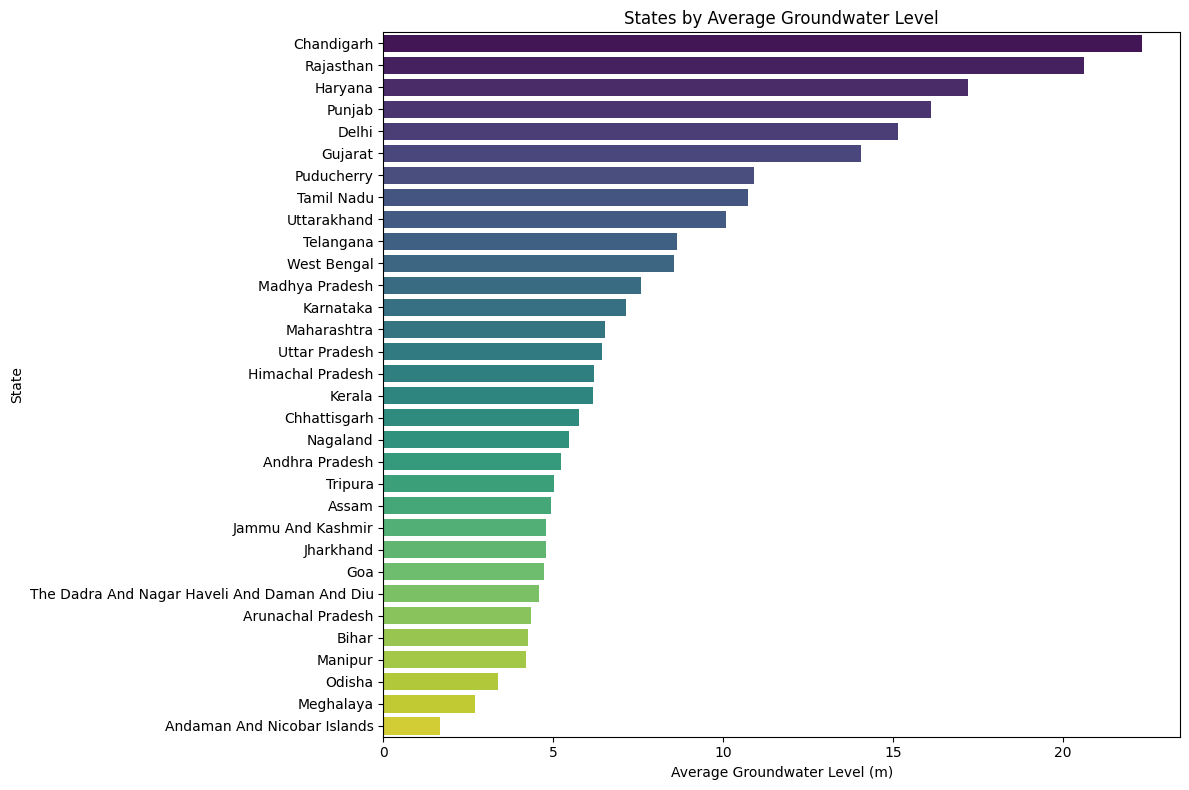

In [ ]:
district_avg = df.groupby('state_name')['currentlevel'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=district_avg.head(32), y='state_name', x='currentlevel', palette='viridis')
plt.title('States by Average Groundwater Level')
plt.xlabel('Average Groundwater Level (m)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

/tmp/ipython-input-14-2788724021.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_avg, x='season', y='currentlevel', order=['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'], palette='viridis')


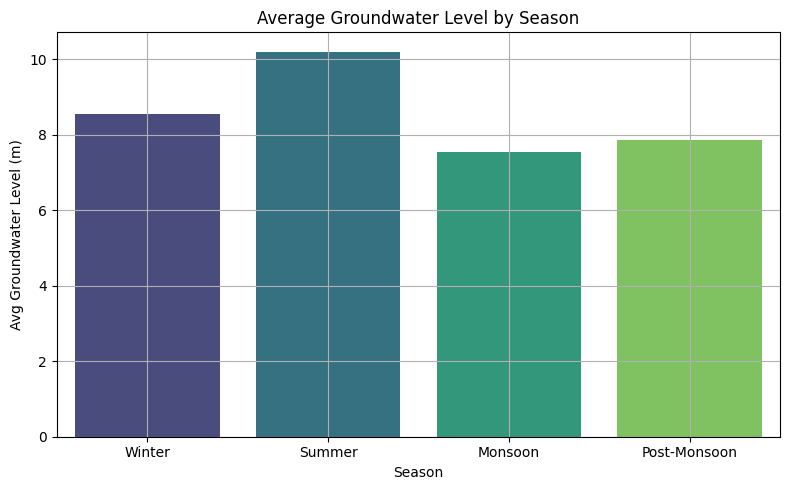

In [ ]:
df= df.dropna(subset=['date', 'currentlevel'])
df['month'] = df['date'].dt.month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['season'] = df['month'].apply(get_season)
season_avg = df.groupby('season')['currentlevel'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=season_avg, x='season', y='currentlevel', order=['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'], palette='viridis')
plt.title('Average Groundwater Level by Season')
plt.xlabel('Season')
plt.ylabel('Avg Groundwater Level (m)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df.columns = df.columns.str.strip().str.lower()
df_sorted = df.sort_values(by='currentlevel')

print("Top 10 Shallowest Water Levels:")
print(df_sorted.head(10)[['district_name', 'state_name', 'station_name', 'currentlevel', 'date']])

print("\n Top 10 Deepest Water Levels:")
print(df_sorted.tail(10)[['district_name', 'state_name', 'station_name', 'currentlevel', 'date']])


Top 10 Shallowest Water Levels:
       district_name      state_name     station_name  currentlevel       date
66534      Sambalpur          Odisha       Babubandha           0.0 2019-01-09
508878        Ujjain  Madhya Pradesh    Delchi buzurg           0.0 2019-08-11
15803        Purulia     West Bengal        Dangardi3           0.0 2018-05-19
544748     Ahmedabad         Gujarat        Viramgam2           0.0 2020-08-24
32954        Birbhum     West Bengal           Ganpur           0.0 2019-08-01
533262      Junagadh         Gujarat        Junagadh1           0.0 2020-08-24
206549           Mau   Uttar Pradesh            Ghosi           0.0 2020-08-24
441252       Khammam       Telangana  Nayakangudem-PZ           0.0 2019-01-04
485003        Ratlam  Madhya Pradesh          Dhodhar           0.0 2019-08-04
176605      Chittoor  Andhra Pradesh  Karvetinagar-PZ           0.0 2021-01-09

 Top 10 Deepest Water Levels:
       district_name  state_name  station_name  currentlevel       d

/tmp/ipython-input-22-1460799455.py:15: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


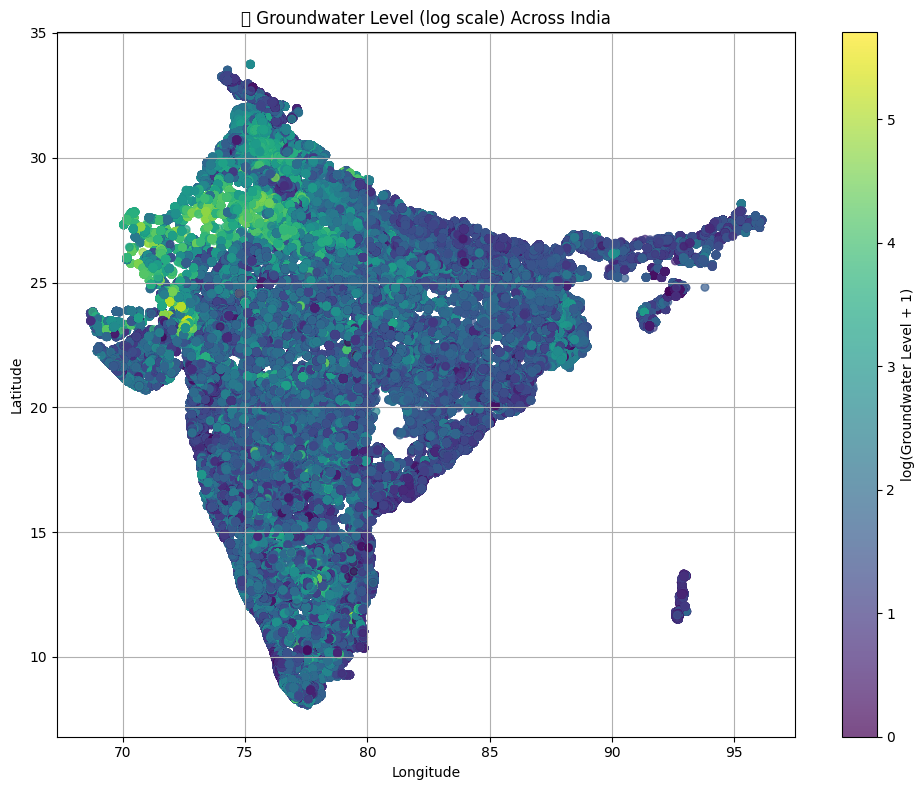

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df['longitude'],
    df['latitude'],
    c=numpy.log1p(df['currentlevel']),  # log transform
    cmap='viridis',
    s=30, alpha=0.7
)

plt.colorbar(scatter, label='log(Groundwater Level + 1)')
plt.title('📍 Groundwater Level (log scale) Across India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-25-1153532258.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


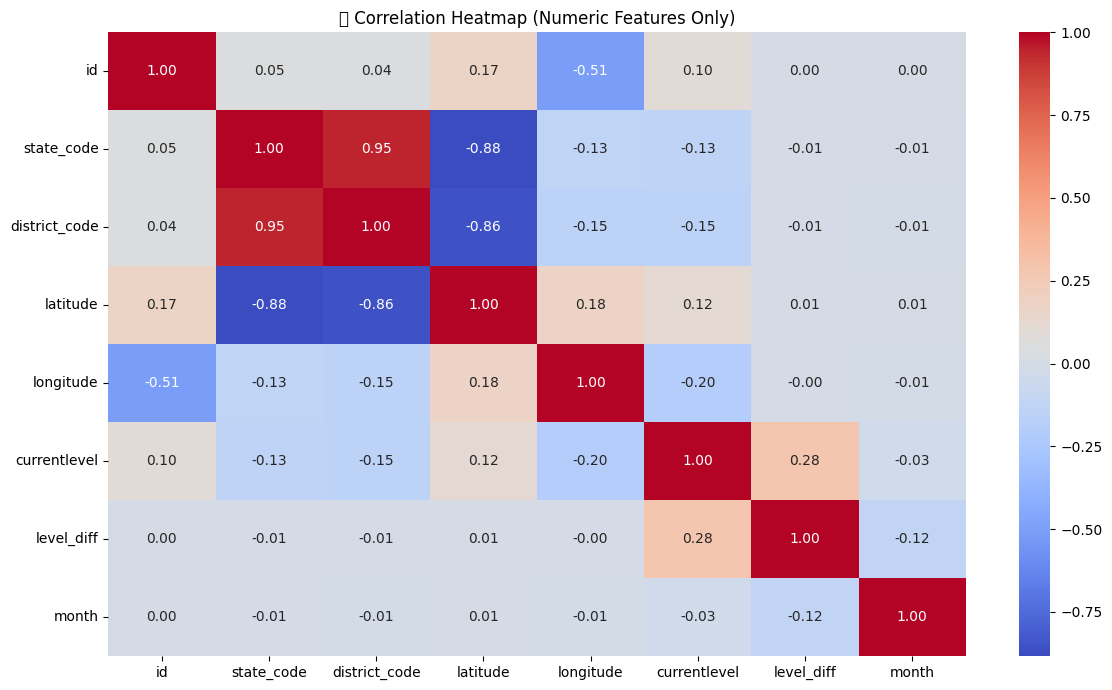

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()